In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
sin_wave = np.array([((0.1*x) + math.sin(0.5*x)) for x in np.arange(2000)])

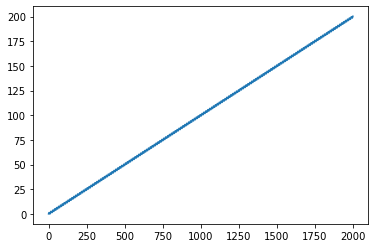

<Figure size 432x288 with 0 Axes>

In [3]:
plt.plot(sin_wave)
plt.show()
plt.clf()

In [4]:
X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len

for i in range(seq_len, num_records):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)

In [5]:
X_val = []
Y_val = []

for i in range(seq_len):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)

In [6]:
model = keras.Sequential()
model.add(layers.SimpleRNN(20, activation='relu'))
model.add(layers.Dense(1))

In [7]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
history = model.fit(X, Y, epochs=50, verbose=1)

Epoch 1/50
60/60 [==============================] - 0s 5ms/step - loss: 2312.6753
Epoch 2/50
60/60 [==============================] - 0s 5ms/step - loss: 7.1744
Epoch 3/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2421
Epoch 4/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2286
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2293
Epoch 6/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2296
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2287
Epoch 8/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2295
Epoch 9/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2302
Epoch 10/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2290
Epoch 11/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2288
Epoch 12/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2296
Epoch 13/50
60/60 [===========================

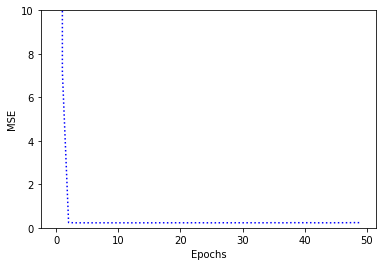

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(history.history['loss'], ':b',label='MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 10)
plt.show()
plt.clf()

In [10]:
test_output = model.predict(X_val, verbose=1)

2/2 [==============================] - 0s 3ms/step


In [11]:
X_val.shape, Y_val.shape

((50, 50, 1), (50, 1))

In [12]:
MSE = round(mean_squared_error(Y_val[:, 0], test_output[:, 0]), 50)
print(round(MSE, 4))

0.2248


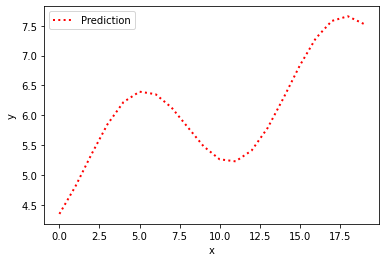

In [13]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(test_output[:20], ':r', label='Prediction', linewidth=2)
#plt.plot(Y_val[:, 0], ':b', label='Actual', linewidth=2)
plt.legend();
#plt.savefig('/Users/austinschladant/Anaconda/Project2/pred.png', dpi=600)
plt.show()

In [14]:
test_output.shape

(50, 1)

In [15]:
'''
Uncomment to save graph
for i in range(0, 50, 2):
    plt.plot(test_output[:i, 0], 'r', label='Prediction', linewidth=2)
    plt.plot(Y_val[:, 0], ':b', label='Actual', linewidth=2)
    plt.title('tanh\nMSE: {}'.format(MSE))
    plt.legend();
    plt.savefig('/Users/PredComplex{}.png'.format(i)
                , dpi=600)
    plt.clf()
'''

"\nUncomment to save graph\nfor i in range(0, 50, 2):\n    plt.plot(test_output[:i, 0], 'r', label='Prediction', linewidth=2)\n    plt.plot(Y_val[:, 0], ':b', label='Actual', linewidth=2)\n    plt.title('tanh\nMSE: {}'.format(MSE))\n    plt.legend();\n    plt.savefig('/Users/PredComplex{}.png'.format(i)\n                , dpi=600)\n    plt.clf()\n"